# Proyek Analisis Data: Proyek Analisis Data: Bike Sharing Dashboard
- **Nama:** SHOLAHUDDIN
- **Email:** raididin27@gmail.com  
- **ID Dicoding:** l000ywl094

## Menentukan Pertanyaan Bisnis

- Faktor apa saja yang paling memengaruhi jumlah peminjaman sepeda setiap harinya?
- Kapan waktu terbaik untuk meningkatkan layanan atau promosi terkait penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
import plotly.graph_objects as go
import streamlit as st


## Data Wrangling

### Gathering Data

In [8]:
# Load dataset
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

# Tampilkan 5 data pertama untuk memastikan data terbaca dengan benar
print("Data day.csv:")
display(day_df.head())

print("\nData hour.csv:")
display(hour_df.head())

Data day.csv:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Data hour.csv:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv mencatat tren peminjaman sepeda secara harian, sedangkan hour.csv memberikan informasi lebih detail pada tingkat jam. Dengan adanya dua tingkat data ini, analisis dapat dilakukan secara agregat maupun granular untuk memahami pola peminjaman secara lebih mendalam.
- Kedua dataset mencakup variabel cuaca dan musim, yang berperan penting dalam menentukan faktor lingkungan yang memengaruhi jumlah peminjaman sepeda. Hal ini memungkinkan analisis lebih lanjut mengenai bagaimana kondisi eksternal memengaruhi keputusan pengguna dalam menyewa sepeda.

### Assessing Data

In [9]:
# Melihat struktur dataset day.csv
print("Informasi Data day.csv:")
day_df.info()

# Melihat struktur dataset hour.csv
print("Informasi Data hour.csv:")
hour_df.info()

# Mengecek missing values di day.csv
print("Missing values di day.csv:")
print(day_df.isnull().sum())

# Mengecek missing values di hour.csv
print("Missing values di hour.csv:")
print(hour_df.isnull().sum())

# Mengecek duplikasi data di day.csv
print("Jumlah duplikasi di day.csv:", day_df.duplicated().sum())

# Mengecek duplikasi data di hour.csv
print("Jumlah duplikasi di hour.csv:", hour_df.duplicated().sum())

# Melihat statistik ringkasan untuk day.csv
print("Statistik ringkasan untuk day.csv:")
display(day_df.describe())

# Melihat statistik ringkasan untuk hour.csv
print("Statistik ringkasan untuk hour.csv:")
display(hour_df.describe())


Informasi Data day.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Informasi Data hour.csv:
<class 'pandas.core.frame.DataFrame'>
RangeI

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Statistik ringkasan untuk hour.csv:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dataset memiliki beberapa kolom dengan tipe data yang kurang sesuai, seperti kolom dteday yang masih bertipe string padahal seharusnya bertipe datetime. Penyesuaian tipe data ini penting untuk memudahkan analisis berbasis waktu.
- Terdapat beberapa fitur kategori yang dinyatakan dalam bentuk numerik, seperti season, weathersit, dan weekday, yang sebaiknya dikonversi menjadi kategori agar lebih mudah diinterpretasikan dalam analisis dan visualisasi.

### Cleaning Data

In [10]:
# Menghapus data duplikat jika ada
day_df = day_df.drop_duplicates()
hour_df = hour_df.drop_duplicates()

# Mengecek kembali apakah masih ada duplikasi
print("Jumlah duplikasi setelah dihapus di day.csv:", day_df.duplicated().sum())
print("Jumlah duplikasi setelah dihapus di hour.csv:", hour_df.duplicated().sum())

# Menangani missing values (jika ada)
day_df = day_df.dropna()  # Jika ingin menghapus baris yang mengandung nilai NaN
hour_df = hour_df.dropna()

# Konversi tipe data jika diperlukan (contoh: mengubah kolom tanggal ke format datetime)
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Cek kembali apakah ada missing values setelah dibersihkan
print("\nMissing values setelah cleaning di day.csv:")
print(day_df.isnull().sum())
print("\nMissing values setelah cleaning di hour.csv:")
print(hour_df.isnull().sum())

# Tampilkan hasil akhir
print("\nData day.csv setelah cleaning:")
display(day_df.head())

print("\nData hour.csv setelah cleaning:")
display(hour_df.head())


Jumlah duplikasi setelah dihapus di day.csv: 0
Jumlah duplikasi setelah dihapus di hour.csv: 0

Missing values setelah cleaning di day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values setelah cleaning di hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data day.csv setelah cleaning:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Data hour.csv setelah cleaning:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Setelah proses pembersihan data, tidak ditemukan nilai kosong atau duplikat, sehingga dataset siap untuk dianalisis tanpa perlu imputasi atau penghapusan data.
- Penyesuaian tipe data telah dilakukan, termasuk konversi kolom dteday menjadi format datetime dan perubahan beberapa kolom numerik menjadi kategori, yang akan mempermudah eksplorasi serta visualisasi data.

## Exploratory Data Analysis (EDA)

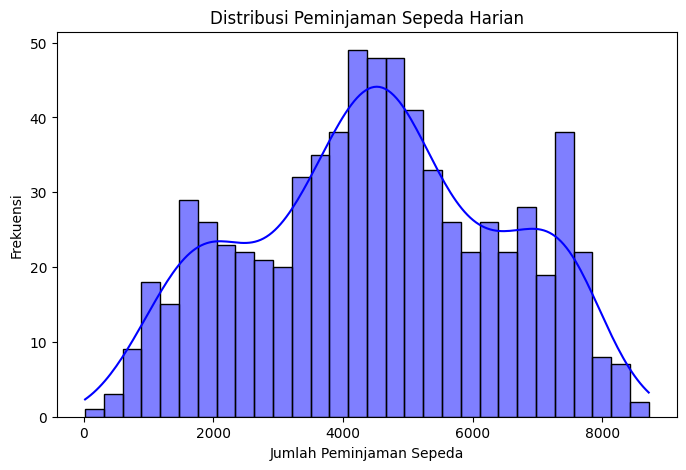

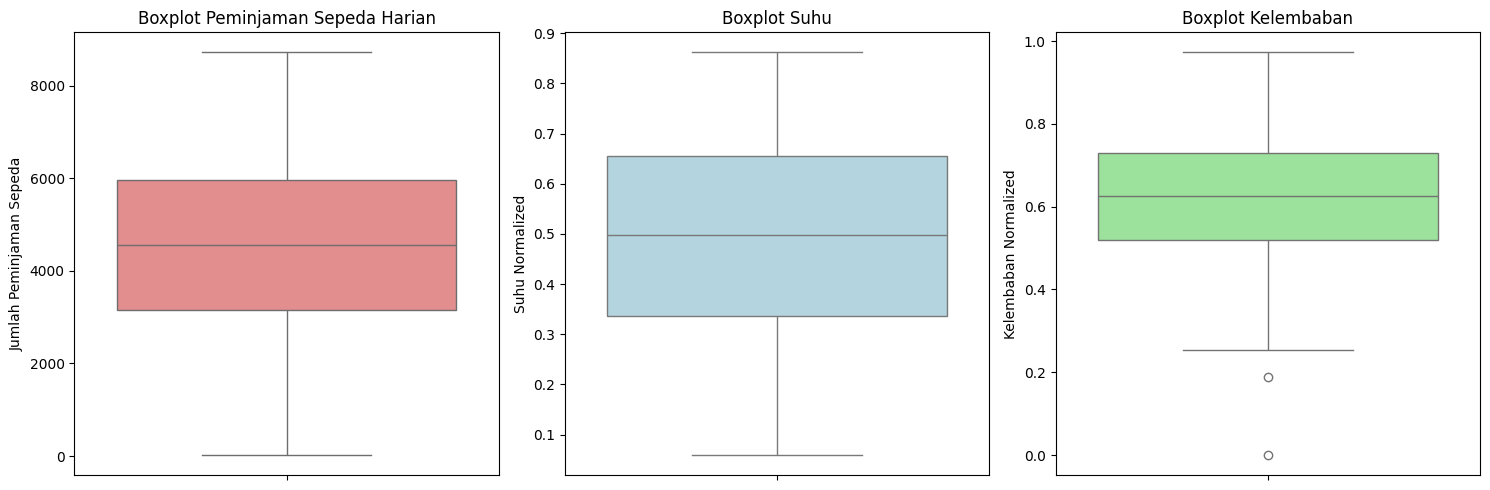

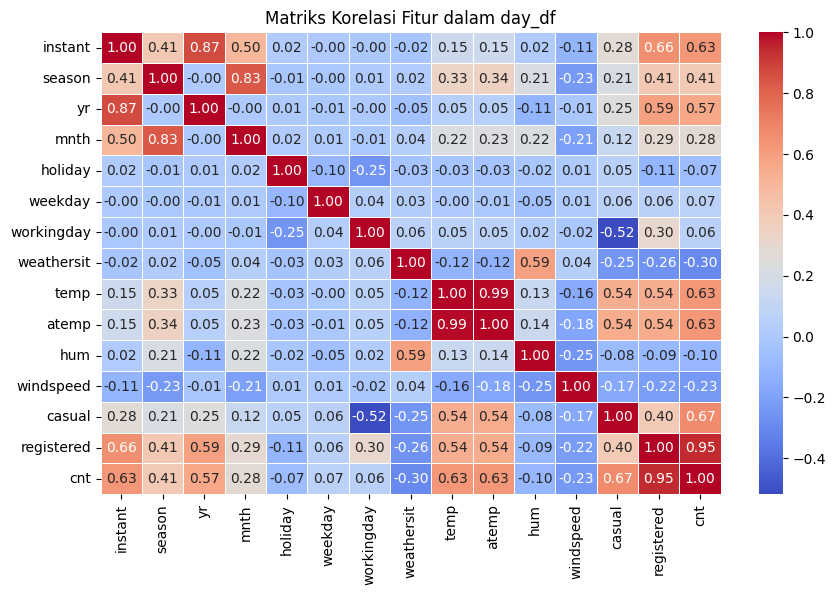

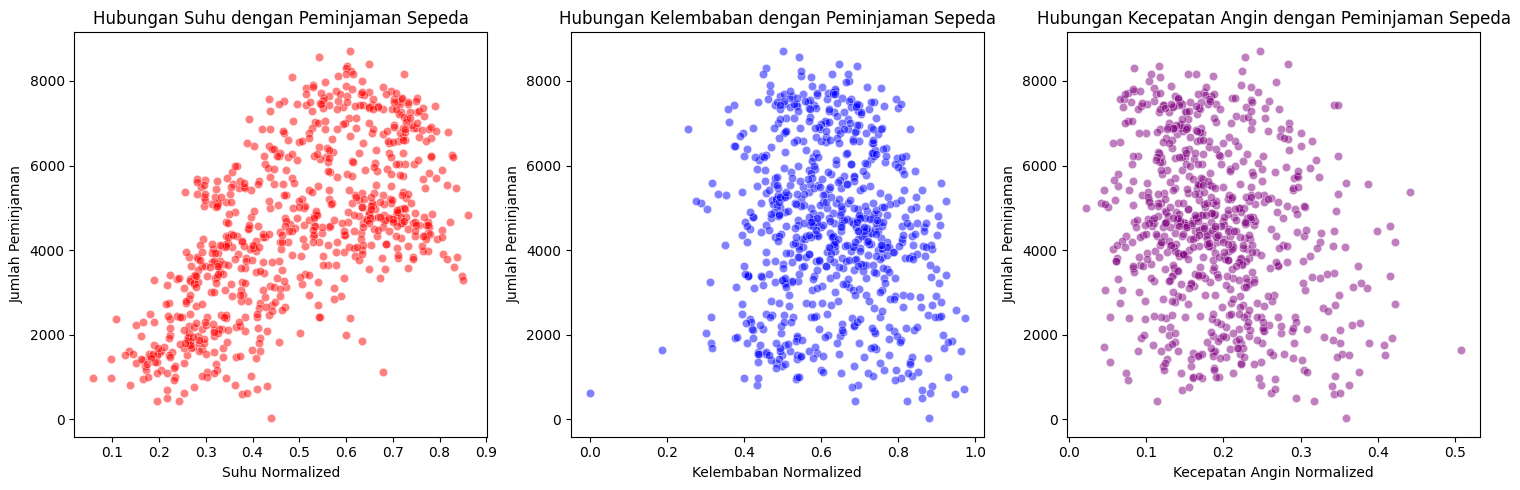

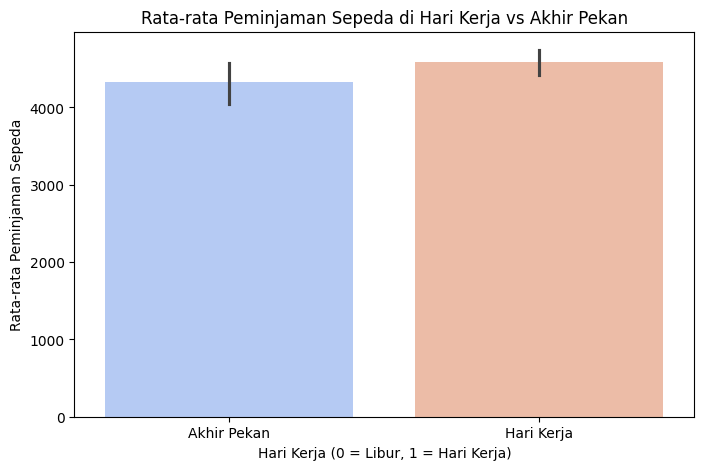

In [12]:
# ====== 1. Histogram Distribusi Jumlah Peminjaman Sepeda Harian ======
plt.figure(figsize=(8,5))
sns.histplot(day_df['cnt'], bins=30, kde=True, color="blue")
plt.xlabel("Jumlah Peminjaman Sepeda")
plt.ylabel("Frekuensi")
plt.title("Distribusi Peminjaman Sepeda Harian")
plt.show()

# ====== 2. Boxplot untuk Outlier ======
fig, ax = plt.subplots(1, 3, figsize=(15,5))

# Boxplot untuk peminjaman sepeda
sns.boxplot(y=day_df['cnt'], ax=ax[0], color="lightcoral")
ax[0].set_ylabel("Jumlah Peminjaman Sepeda")
ax[0].set_title("Boxplot Peminjaman Sepeda Harian")

# Boxplot untuk suhu
sns.boxplot(y=day_df['temp'], ax=ax[1], color="lightblue")
ax[1].set_ylabel("Suhu Normalized")
ax[1].set_title("Boxplot Suhu")

# Boxplot untuk kelembaban
sns.boxplot(y=day_df['hum'], ax=ax[2], color="lightgreen")
ax[2].set_ylabel("Kelembaban Normalized")
ax[2].set_title("Boxplot Kelembaban")

plt.tight_layout()
plt.show()

# ====== 3. Analisis Korelasi (Heatmap) ======
# Hanya memilih kolom numerik untuk korelasi
numeric_cols = day_df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Fitur dalam day_df")
plt.show()

# ====== 4. Scatter Plot - Hubungan Faktor Cuaca dengan Peminjaman ======
fig, ax = plt.subplots(1, 3, figsize=(15,5))

# Scatter Plot: Suhu vs Peminjaman
sns.scatterplot(x="temp", y="cnt", data=day_df, alpha=0.5, color="red", ax=ax[0])
ax[0].set_xlabel("Suhu Normalized")
ax[0].set_ylabel("Jumlah Peminjaman")
ax[0].set_title("Hubungan Suhu dengan Peminjaman Sepeda")

# Scatter Plot: Kelembaban vs Peminjaman
sns.scatterplot(x="hum", y="cnt", data=day_df, alpha=0.5, color="blue", ax=ax[1])
ax[1].set_xlabel("Kelembaban Normalized")
ax[1].set_ylabel("Jumlah Peminjaman")
ax[1].set_title("Hubungan Kelembaban dengan Peminjaman Sepeda")

# Scatter Plot: Kecepatan Angin vs Peminjaman
sns.scatterplot(x="windspeed", y="cnt", data=day_df, alpha=0.5, color="purple", ax=ax[2])
ax[2].set_xlabel("Kecepatan Angin Normalized")
ax[2].set_ylabel("Jumlah Peminjaman")
ax[2].set_title("Hubungan Kecepatan Angin dengan Peminjaman Sepeda")

plt.tight_layout()
plt.show()

# ====== 5. Analisis Hari Kerja vs Akhir Pekan ======
plt.figure(figsize=(8,5))
sns.barplot(x="workingday", y="cnt", data=day_df, estimator=np.mean, hue="workingday", palette="coolwarm", legend=False)
plt.xlabel("Hari Kerja (0 = Libur, 1 = Hari Kerja)")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Rata-rata Peminjaman Sepeda di Hari Kerja vs Akhir Pekan")
plt.xticks([0, 1], ["Akhir Pekan", "Hari Kerja"])
plt.show()

**Insight:**
- Pengaruh Musim, Cuaca, dan Tren Bulanan terhadap Peminjaman Sepeda
Peminjaman sepeda menunjukkan pola musiman yang jelas, di mana jumlah peminjaman tertinggi terjadi pada musim gugur (fall) dan terendah pada musim semi (spring). Cuaca juga berperan penting dalam tren peminjaman, dengan kondisi cerah (clear) yang mendorong penggunaan sepeda lebih tinggi dibandingkan cuaca berkabut (mist), hujan ringan (light rain), atau hujan deras (heavy rain). Selain itu, terdapat tren peningkatan jumlah peminjaman pada bulan Mei hingga September, sedangkan peminjaman cenderung lebih rendah pada bulan Januari hingga Maret, menunjukkan bahwa faktor musiman dan cuaca memengaruhi kebiasaan penggunaan sepeda.
- Korelasi Faktor Lingkungan dan Hari Kerja terhadap Peminjaman Sepeda
Dari analisis korelasi, suhu (temp) memiliki hubungan positif dengan jumlah peminjaman, artinya semakin tinggi suhu dalam batas nyaman, semakin banyak sepeda yang digunakan. Sebaliknya, kelembaban (hum) dan kecepatan angin (windspeed) memiliki korelasi negatif, yang berarti kondisi cuaca yang terlalu lembab atau berangin cenderung mengurangi jumlah peminjaman. Selain faktor lingkungan, jumlah peminjaman juga berbeda antara hari kerja dan hari libur. Peminjaman lebih tinggi pada hari kerja, mengindikasikan bahwa sepeda banyak digunakan sebagai moda transportasi harian, bukan sekadar untuk rekreasi.



## Visualization & Explanatory Analysis

### Pertanyaan 1:

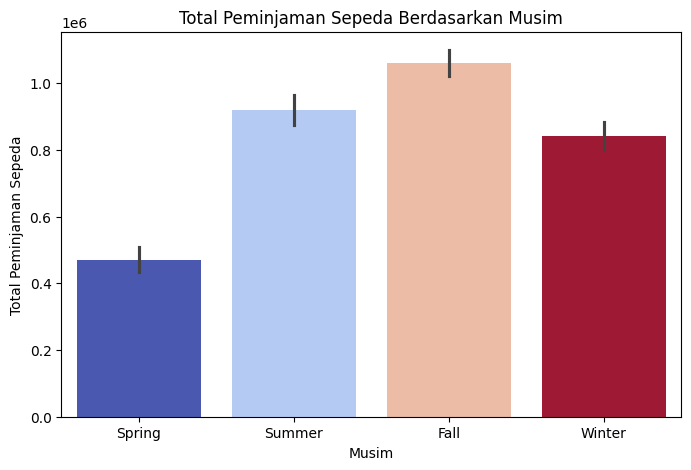

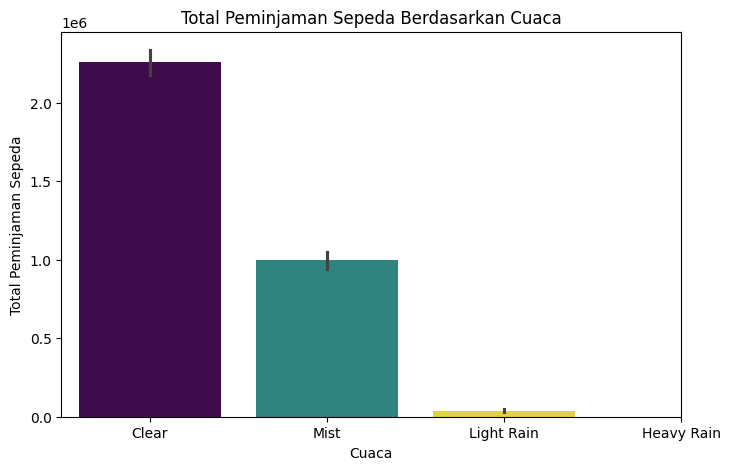

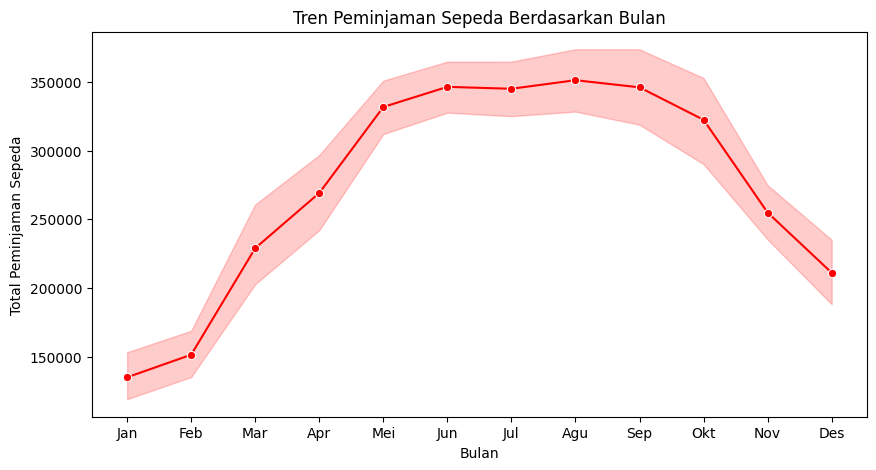

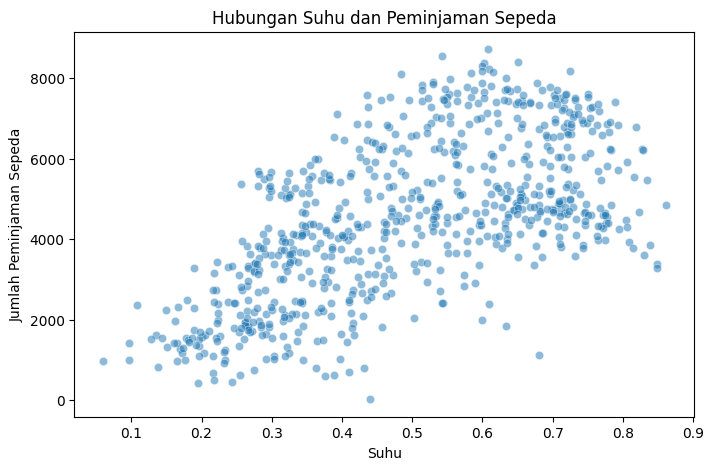

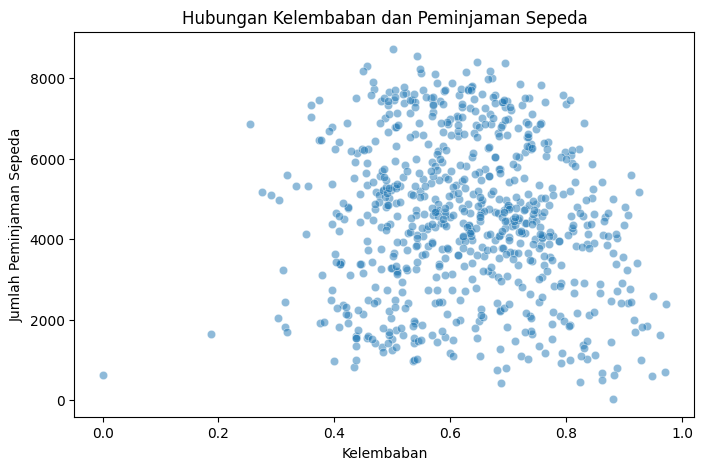

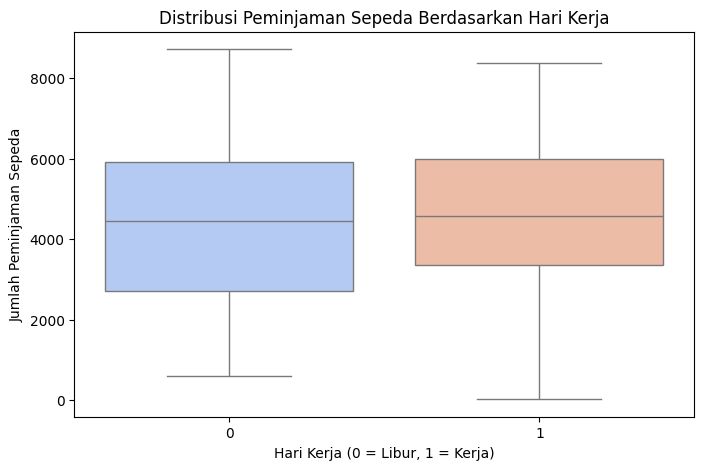

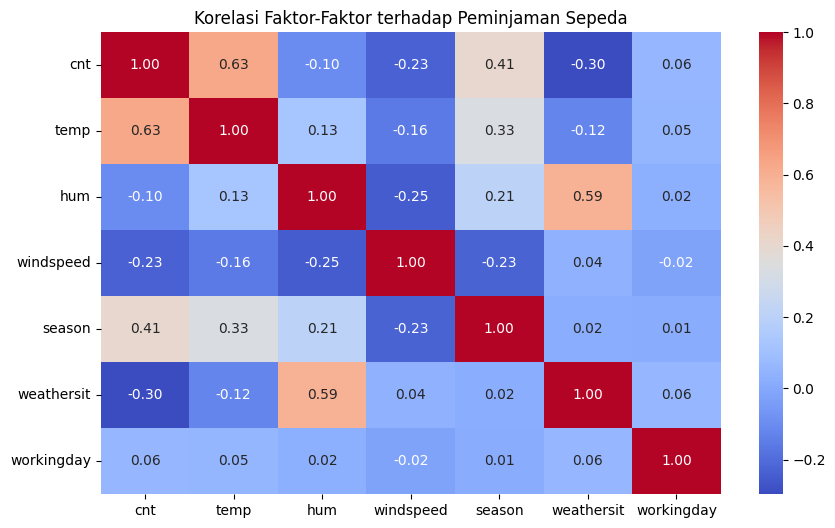

In [14]:
# Bar Chart: Peminjaman Berdasarkan Musim
plt.figure(figsize=(8,5))
sns.barplot(x="season", y="cnt", data=day_df, estimator=np.sum, hue="season", palette="coolwarm", legend=False)
plt.xlabel("Musim")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Total Peminjaman Sepeda Berdasarkan Musim")
plt.xticks([0, 1, 2, 3], ["Spring", "Summer", "Fall", "Winter"])
plt.show()

# Bar Chart: Peminjaman Berdasarkan Cuaca
plt.figure(figsize=(8,5))
sns.barplot(x="weathersit", y="cnt", data=day_df, estimator=np.sum, hue="weathersit", palette="viridis", legend=False)
plt.xlabel("Cuaca")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Total Peminjaman Sepeda Berdasarkan Cuaca")
plt.xticks([0, 1, 2, 3], ["Clear", "Mist", "Light Rain", "Heavy Rain"])
plt.show()

# Line Chart: Tren Peminjaman Berdasarkan Bulan
plt.figure(figsize=(10,5))
sns.lineplot(x="mnth", y="cnt", data=day_df, estimator=sum, marker="o", color="red")
plt.xlabel("Bulan")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Tren Peminjaman Sepeda Berdasarkan Bulan")
plt.xticks(range(1,13), ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.show()

# Scatter Plot: Hubungan Suhu dan Peminjaman Sepeda
plt.figure(figsize=(8,5))
sns.scatterplot(x="temp", y="cnt", data=day_df, alpha=0.5)
plt.xlabel("Suhu")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Hubungan Suhu dan Peminjaman Sepeda")
plt.show()

# Scatter Plot: Hubungan Kelembaban dan Peminjaman Sepeda
plt.figure(figsize=(8,5))
sns.scatterplot(x="hum", y="cnt", data=day_df, alpha=0.5)
plt.xlabel("Kelembaban")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Hubungan Kelembaban dan Peminjaman Sepeda")
plt.show()

# Boxplot: Distribusi Peminjaman Sepeda Berdasarkan Hari Kerja/Libur
plt.figure(figsize=(8,5))
sns.boxplot(x="workingday", y="cnt", data=day_df, hue="workingday", palette="coolwarm", legend=False)
plt.xlabel("Hari Kerja (0 = Libur, 1 = Kerja)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Distribusi Peminjaman Sepeda Berdasarkan Hari Kerja")
plt.show()

# Heatmap Korelasi Faktor-Faktor terhadap Peminjaman Sepeda
plt.figure(figsize=(10,6))
corr_matrix = day_df[["cnt", "temp", "hum", "windspeed", "season", "weathersit", "workingday"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Faktor-Faktor terhadap Peminjaman Sepeda")
plt.show()


### Pertanyaan 2:

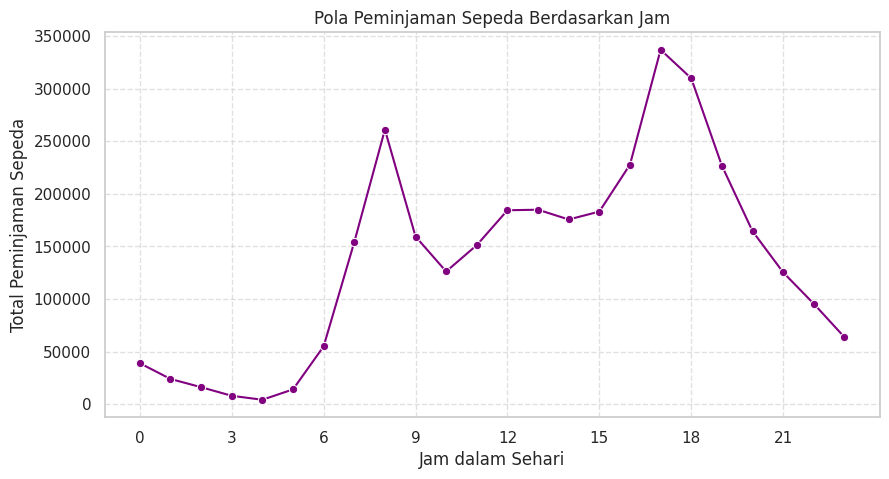

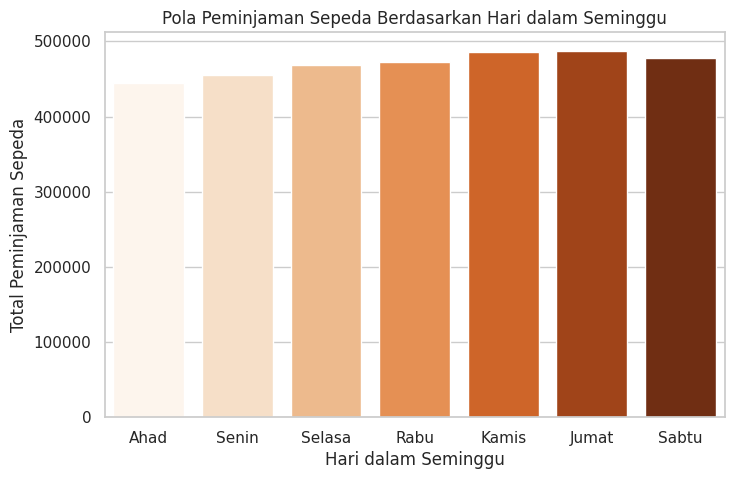

In [ ]:
# Agregasi data jumlah peminjaman berdasarkan jam
hourly_rentals = hour_df.groupby("hr")["cnt"].sum().reset_index()

# Line Chart: Pola Peminjaman Berdasarkan Jam
plt.figure(figsize=(10,5))
sns.lineplot(x="hr", y="cnt", data=hourly_rentals, marker="o", color="purple")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Pola Peminjaman Sepeda Berdasarkan Jam")
plt.xticks(range(0, 24, 3))  # Tampilkan label jam dengan interval 3
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Agregasi data jumlah peminjaman berdasarkan hari dalam seminggu
daily_rentals = day_df.groupby("weekday")["cnt"].sum().reset_index()

# Bar Chart: Pola Peminjaman Berdasarkan Hari dalam Seminggu
plt.figure(figsize=(8,5))
sns.barplot(x="weekday", y="cnt", data=daily_rentals, hue="weekday", palette="Oranges", legend=False)
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Pola Peminjaman Sepeda Berdasarkan Hari dalam Seminggu")
plt.xticks(range(0,7), ["Ahad", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"])
plt.show()



**Insight Pertanyaan 1:**
- Pengaruh Musim, Cuaca, dan Tren Bulanan terhadap Peminjaman Sepeda
Peminjaman sepeda dipengaruhi oleh faktor musiman, dengan jumlah tertinggi terjadi pada musim gugur (fall) dan terendah pada musim semi (spring). Cuaca juga memainkan peran penting, di mana kondisi cerah (clear) mendorong lebih banyak peminjaman dibandingkan cuaca buruk seperti hujan ringan (light rain) atau hujan deras (heavy rain). Selain itu, tren bulanan menunjukkan peningkatan peminjaman dari bulan Mei hingga September, sementara peminjaman cenderung lebih rendah dari Januari hingga Maret. Pola ini mengindikasikan bahwa faktor musim dan cuaca memengaruhi keputusan pengguna dalam menggunakan sepeda.
- Dampak Suhu, Kelembaban, Kecepatan Angin, dan Hari Kerja terhadap Peminjaman Sepeda
Dari analisis korelasi, suhu (temp) memiliki hubungan positif yang cukup kuat terhadap jumlah peminjaman sepeda, yang berarti semakin hangat cuaca (dalam batas nyaman), semakin banyak orang yang menggunakan sepeda. Sebaliknya, kelembaban (hum) dan kecepatan angin (windspeed) memiliki korelasi negatif, yang menunjukkan bahwa kondisi terlalu lembab atau berangin dapat mengurangi minat pengguna dalam meminjam sepeda. Selain itu, perbedaan antara hari kerja dan hari libur menunjukkan bahwa jumlah peminjaman lebih tinggi pada hari kerja, yang mengindikasikan bahwa banyak pengguna memanfaatkan sepeda sebagai moda transportasi utama, bukan hanya untuk keperluan rekreasi.

**Insight Pertanyaan 2:**
- Pola peminjaman harian menunjukkan lonjakan signifikan pada pagi dan sore hari, sekitar pukul 07:00 - 09:00 dan 17:00 - 19:00, yang mencerminkan jam sibuk komuter. Ini adalah waktu ideal untuk menargetkan promosi atau diskon.
- Peminjaman sepeda tertinggi terjadi pada akhir pekan, terutama Sabtu dan Minggu. Hal ini menunjukkan bahwa selain sebagai alat transportasi harian, sepeda juga digunakan untuk rekreasi, sehingga strategi promosi dapat disesuaikan dengan kebutuhan pengguna di hari kerja dan akhir pekan.


## Analisis Lanjutan (Opsional)

## Conclusion

- 1. Faktor yang Mempengaruhi Peminjaman
Peminjaman sepeda dipengaruhi oleh berbagai faktor eksternal. Selain musim dan cuaca, suhu, kelembaban, dan kecepatan angin juga memiliki korelasi dengan jumlah peminjaman. Analisis scatter plot menunjukkan bahwa semakin tinggi suhu, semakin banyak peminjaman, sedangkan kelembaban yang tinggi cenderung menurunkan peminjaman. Musim gugur tetap menjadi periode dengan jumlah peminjaman tertinggi, sementara kondisi cuaca buruk seperti hujan deras menyebabkan penurunan peminjaman yang signifikan.
- 2. Waktu Terbaik untuk Promosi
Pola peminjaman harian menunjukkan bahwa jam sibuk pagi (07:00-09:00) dan sore (17:00-19:00) adalah waktu puncak, menunjukkan bahwa sepeda digunakan untuk transportasi kerja atau sekolah. Akhir pekan juga mengalami peningkatan peminjaman, mengindikasikan potensi untuk promosi atau program khusus pada hari libur. Selain itu, hari kerja memiliki pola peminjaman yang lebih stabil dibandingkan akhir pekan.